In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
data.shape

(158, 12)

In [29]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [28]:
# encoding of data frame
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [30]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [31]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


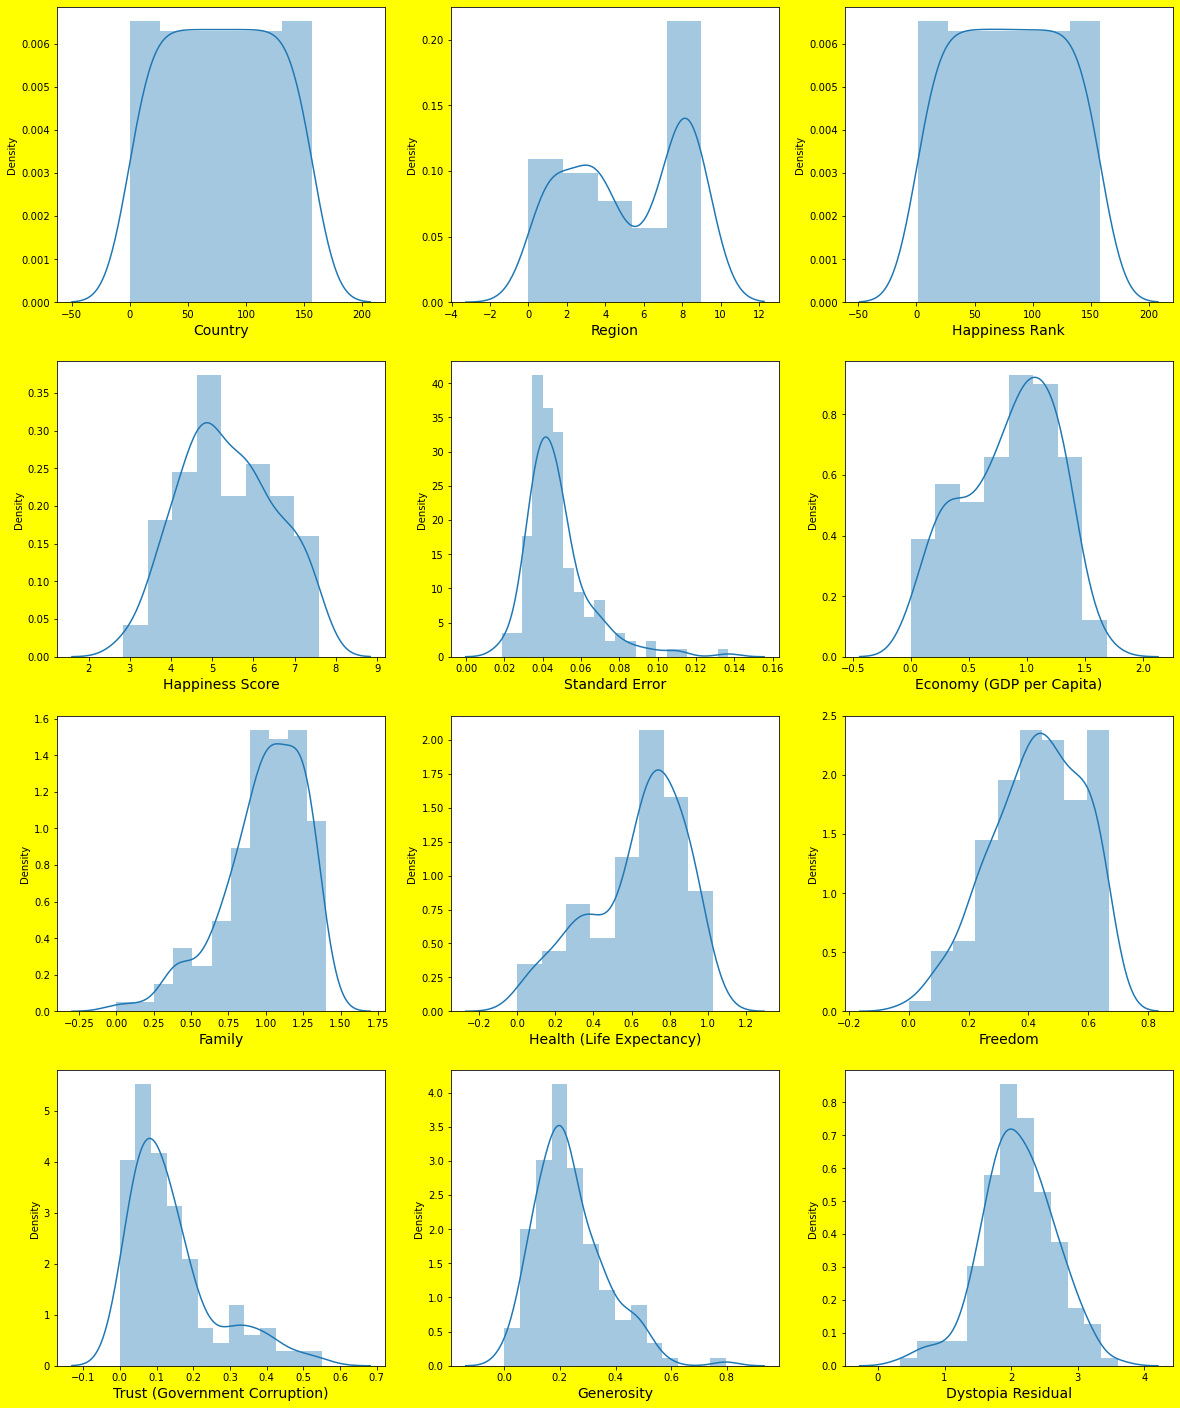

In [35]:
# lets see how data is distributed for every column
plt.figure(figsize = (20,25),facecolor = "yellow")
plotnumber = 1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [46]:
# some skewness are present so to remove first 
data.skew()


Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

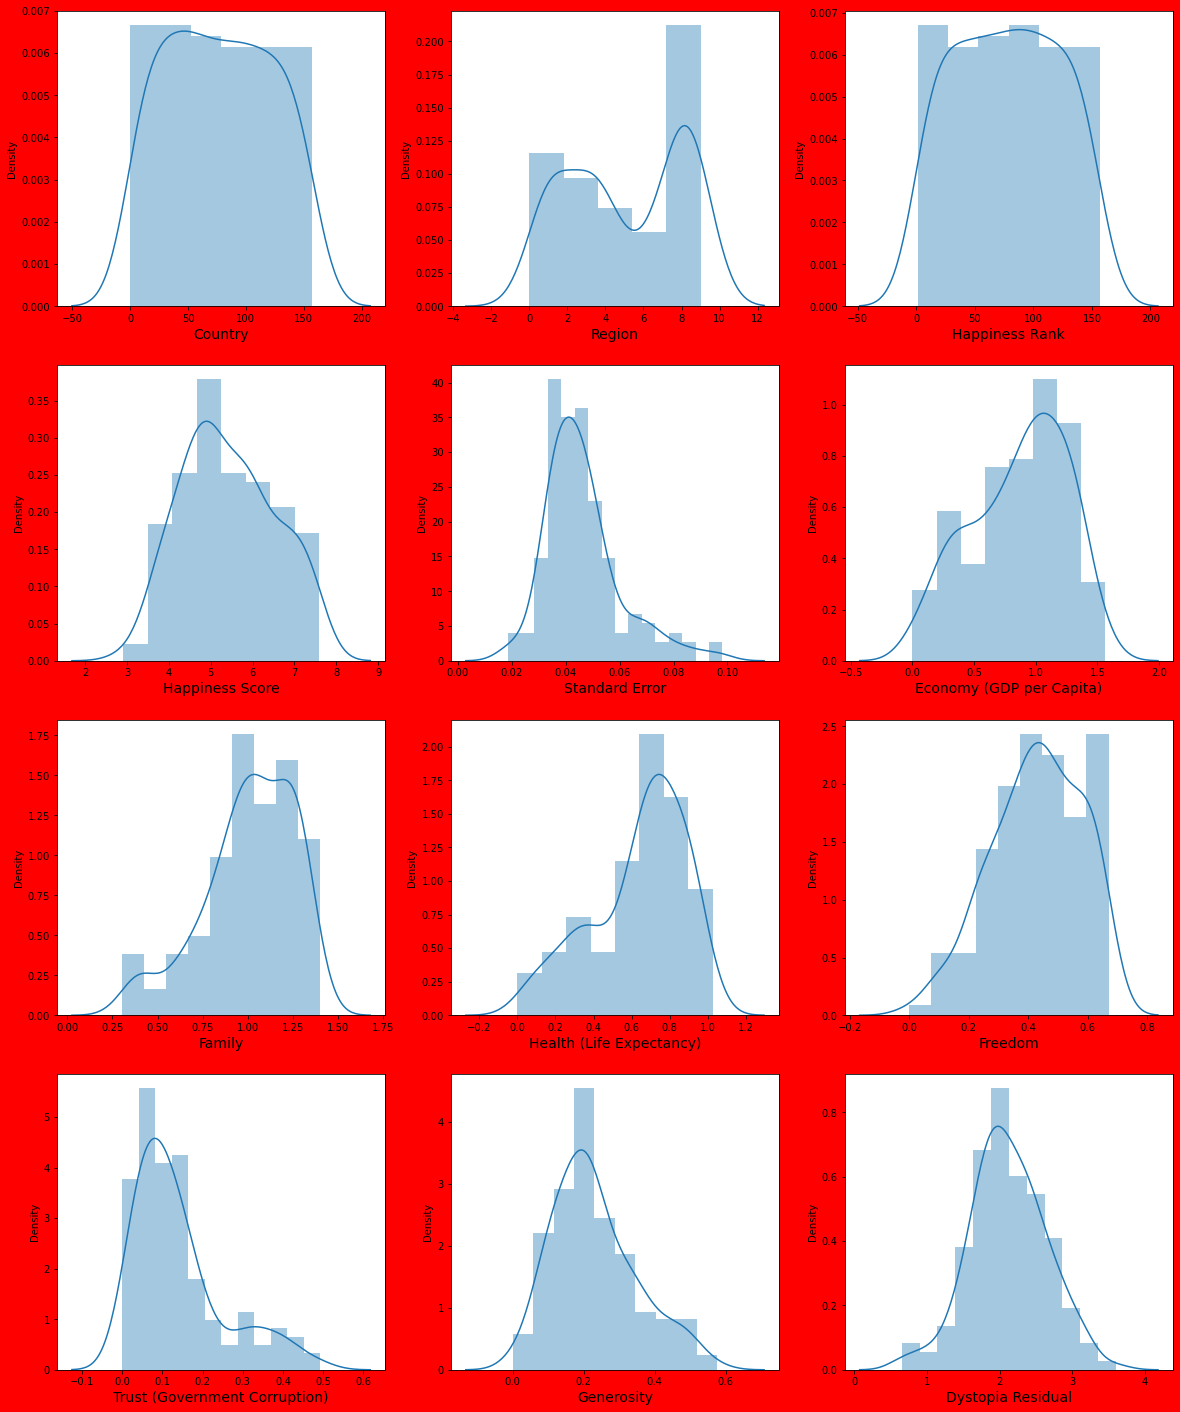

In [48]:
# lets see how data is looks like after removal of skewness
plt.figure(figsize = (20,25),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [33]:
# correlation

data.corr()
data.corr()['Happiness Score'].sort_values()



Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

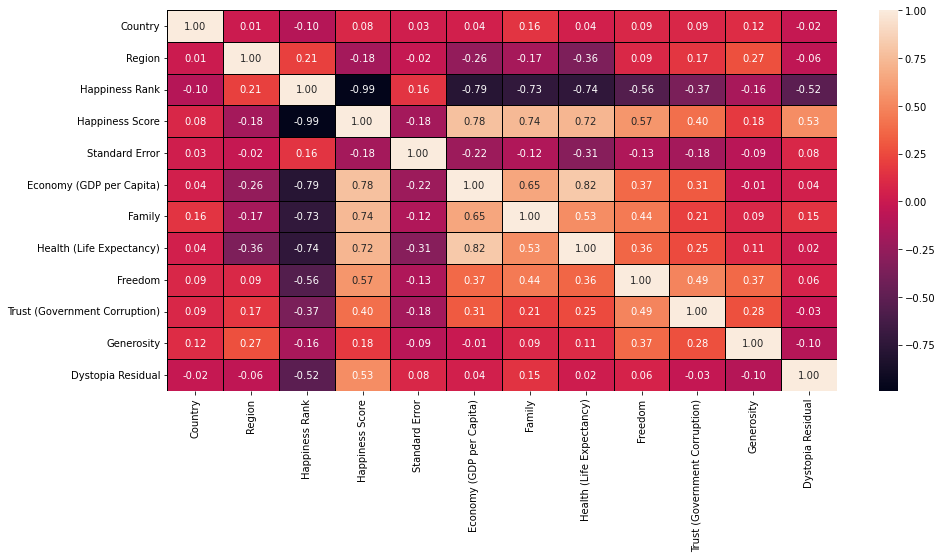

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

In [20]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    float64
 1   Region                         149 non-null    float64
 2   Happiness Rank                 149 non-null    int64  
 3   Happiness Score                149 non-null    float64
 4   Standard Error                 149 non-null    float64
 5   Economy (GDP per Capita)       149 non-null    float64
 6   Family                         149 non-null    float64
 7   Health (Life Expectancy)       149 non-null    float64
 8   Freedom                        149 non-null    float64
 9   Trust (Government Corruption)  149 non-null    float64
 10  Generosity                     149 non-null    float64
 11  Dystopia Residual              149 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 15.1 KB


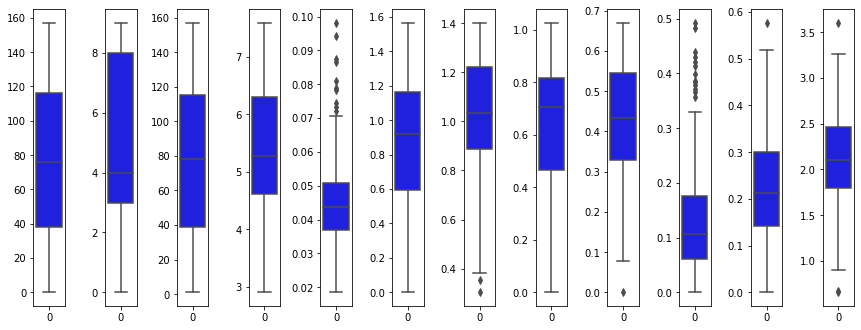

In [52]:
collist = data.columns.values
ncol = 30
nrows = 20
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [53]:
from scipy.stats import zscore

In [54]:
z_score = zscore(data[['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']])
abs_z_score = np.abs(z_score)
threshold=3
np.where(abs_z_score>3)

(array([ 2, 23, 38, 93], dtype=int64), array([3, 3, 0, 0], dtype=int64))

In [55]:
fil_entry = (abs_z_score<3).all(axis=1)
data = data[fil_entry]
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45.0,9.0,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [58]:
# drop the column as are less correlated have skew data and having outliers
data = data.drop(["Country","Trust (Government Corruption)"],axis=1)
data

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
3,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
5,9.0,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.23351,2.61955
...,...,...,...,...,...,...,...,...,...,...
150,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.20165,1.41723
151,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494
152,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.36510,1.95210
154,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.18260,1.63328


In [59]:
data_loss = (158-145)/158*100
data_loss

8.227848101265822

In [60]:
# seprating the columns into features and target
x= data.drop("Happiness Score",axis=1)
y= data["Happiness Score"]

In [64]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x

array([[ 1.32891351, -1.7331055 , -0.97484642, ...,  1.79096765,
         0.66858523,  0.77871485],
       [ 1.32891351, -1.71100747,  0.41612548, ...,  1.47556104,
         1.53399594,  1.12650072],
       [ 1.32891351, -1.66680249, -0.46846872, ...,  1.82713029,
         1.00559904,  0.68038943],
       ...,
       [ 0.63064086,  1.68029645, -1.35830838, ..., -1.23443739,
         1.11912989, -0.29649689],
       [ 0.97737448,  1.72595432, -0.70364484, ...,  0.32869977,
        -0.29472249, -0.91101004],
       [ 0.97737448,  1.77162449,  2.39227823, ..., -1.83890685,
        -0.15066679, -0.52545624]])

In [70]:
# transfering data to remove skewness
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)
x

array([[ 1.32891351, -1.7331055 , -0.97484642, ...,  1.79096765,
         0.66858523,  0.77871485],
       [ 1.32891351, -1.71100747,  0.41612548, ...,  1.47556104,
         1.53399594,  1.12650072],
       [ 1.32891351, -1.66680249, -0.46846872, ...,  1.82713029,
         1.00559904,  0.68038943],
       ...,
       [ 0.63064086,  1.68029645, -1.35830838, ..., -1.23443739,
         1.11912989, -0.29649689],
       [ 0.97737448,  1.72595432, -0.70364484, ...,  0.32869977,
        -0.29472249, -0.91101004],
       [ 0.97737448,  1.77162449,  2.39227823, ..., -1.83890685,
        -0.15066679, -0.52545624]])

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [78]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.9937303977930931}
At random state 0 the testing accuracy is {0.9951759696854208}


At random state 1 the training accuracy is {0.9944341965571917}
At random state 1 the testing accuracy is {0.9920546947676687}


At random state 2 the training accuracy is {0.9943686735226501}
At random state 2 the testing accuracy is {0.9923488820580163}


At random state 3 the training accuracy is {0.9941179521318744}
At random state 3 the testing accuracy is {0.992627258362758}


At random state 4 the training accuracy is {0.9934735665422706}
At random state 4 the testing accuracy is {0.9951708545763138}


At random state 5 the training accuracy is {0.9952041323833631}
At random state 5 the testing accuracy is {0.9888456512367803}


At random state 6 the training accuracy is {0.9940042157432708}
At random state 6 the testing accuracy is {0.9939206208972695}


At random state 7 the training accuracy is {0.9955502486911668}
At random state 7 the testing accu

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [80]:
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
pred_test = lr.predict(x_test)

In [82]:
print(r2_score(y_test,pred_test))

0.9948614282916616


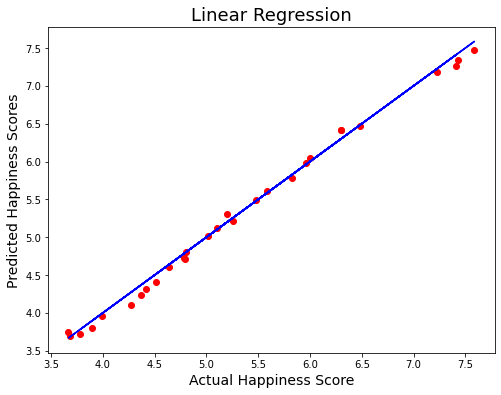

In [103]:
plt.figure(figsize = (8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Scores',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()